# 重参数化技巧

naive grad variance: [7.91395168 0.90189798 0.12620847 0.08845644 0.01570402]
reparameterization grad variance: [0.38985825 0.03445978 0.00866725 0.00434059 0.00090361]


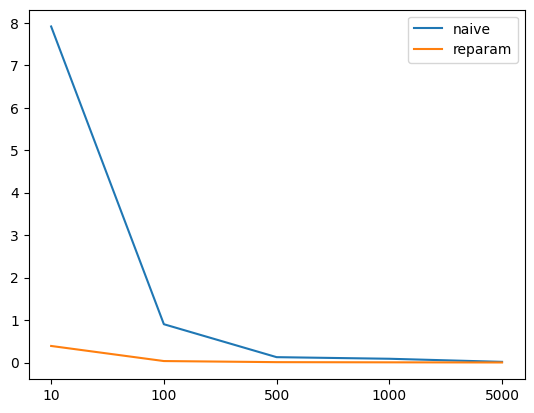

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def naive_grad(x, mu):
    # the naive gradient to mu
    # \nabla_\mu \mathbb{E}_q[x^2] = \mathbb{E}_q[x^2(x-\mu)]
    return np.mean(x ** 2 * (x - mu))
    
def reparam_grad(eps, mu):
    #### You need to finish the reparameterization gradient to mu here ####
    # \nabla_\mu \mathbb{E}_q[x^2] = \mathbb{E}_q[2*(\varepsilon+\mu)]
    return np.mean(2*(mu+eps))
    
def main():
    data_size_list = [10, 100, 500, 1000, 5000]
    sample_num = 100
    mu, sigma = 2.0, 1.0
    # variance of the gradient to mu
    var1 = np.zeros(len(data_size_list))
    var2 = np.zeros(len(data_size_list))

    for i, data_size in enumerate(data_size_list):
        estimation1 = np.zeros(sample_num)
        estimation2 = np.zeros(sample_num)
    
        for n in range(sample_num):
            # 1.naive method
            x = np.random.normal(mu, sigma, size=(data_size, ))
            estimation1[n] = naive_grad(x, mu)
        
            # 2.reparameterization method
            eps = np.random.normal(0.0, 1.0, size=(data_size, ))
            x = eps * sigma + mu
            estimation2[n] = reparam_grad(eps, mu)
            var1[i] = np.var(estimation1)
            var2[i] = np.var(estimation2)
            
    print('naive grad variance: {}'.format(var1))
    print('reparameterization grad variance: {}'.format(var2))
    # plot figure
    index = [_ for _ in range(len(data_size_list))]
    plt.plot(index, var1)
    plt.plot(index, var2)
    plt.xticks(index, data_size_list)
    plt.legend(['naive', 'reparam'])
    plt.savefig('demo/reparam.png')
    plt.show()

if __name__ == "__main__":
    main()